### IMPORT

In [1]:
# --- 1. IMPORT LIBRERIE ---

import pandas as pd
import numpy as np

# GRAFICI
import matplotlib.pyplot as plt
import seaborn as sns

# MODULI SCIKIT-LEARN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# METRICHE
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Utility
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Impostazioni per il notebook
pd.set_option('display.max_columns', None)
print("Librerie importate con successo.")

Librerie importate con successo.


### CARICAMENTO e ISPEZIONE DEI DATI

In [ ]:
# --- 2. CARICAMENTO DATI ---

file_path = '../data/puliti/movimento_fe.csv'

try:
    df = pd.read_csv(file_path)
    
    # Creiamo una copia su cui lavorare
    df_ml = df.copy()

    print(f"File '{file_path}' caricati con successo.")
    print(f"Dimensioni del dataset: {df_ml.shape[0]} righe e {df_ml.shape[1]} colonne.")

    print("Prime 5 righe del dataset:")
    display(df_ml.head())

    print("Informazioni sul dataset:")
    display(df_ml.info())

except FileNotFoundError:
    print(f"Errore: Il file '{file_path}' non è stato trovato.")

File 'movimento_fe.csv' caricati con successo.
Dimensioni del dataset: 15738 righe e 62 colonne.
Prime 5 righe del dataset:


,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,Positioning,Finishing,Shot Power,Long Shots,Volleys,Penalties,Vision,Crossing,Free Kick Accuracy,Short Passing,Long Passing,Curve,Dribbling,Agility,Balance,Reactions,Ball Control,Composure,Interceptions,Heading Accuracy,Def Awareness,Standing Tackle,Sliding Tackle,Jumping,Stamina,Strength,Aggression,Position,Weak foot,Skill moves,Preferred foot,Height,Weight,Alternative positions,Age,Nation,League,Team,play style,num_alt_pos_att,num_alt_pos_cen,num_alt_pos_dif,ps_scoring,ps_scoring_plus,ps_passing,ps_passing_plus,ps_control,ps_control_plus,ps_defend,ps_defend_plus,ps_physical,ps_physical_plus
0,Kylian Mbappé,91,97,90,80,92,36,78,97,97,93,94,90,83,84,84,83,78,69,86,71,80,93,93,82,93,92,88,38,73,26,34,32,88,88,77,64,ST,4,5,Right,"182cm / 6'0""",75kg / 165lb,LW,25,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",1,0,0,1,0,0,0,1,0,0,0,2,1
1,Rodri,91,66,80,86,84,87,85,65,66,76,74,92,89,71,62,84,76,64,93,91,86,84,66,67,93,90,94,84,81,92,87,82,83,91,83,85,CDM,4,3,Right,"191cm / 6'3""",82kg / 181lb,CM,28,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",0,1,0,1,0,1,1,1,0,1,0,1,0
2,Erling Haaland,91,88,92,70,81,45,88,80,94,96,96,94,83,90,90,74,58,62,77,66,77,79,77,69,94,83,87,43,83,38,47,29,92,76,93,88,ST,3,3,Left,"195cm / 6'5""",94kg / 207lb,NaN,24,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",0,0,0,2,0,0,0,1,0,1,0,0,1
3,Jude Bellingham,90,80,87,83,88,78,83,81,80,91,90,85,86,77,74,90,66,68,89,89,73,89,82,79,91,89,87,82,75,77,79,77,84,93,77,85,CAM,4,4,Right,"186cm / 6'1""",75kg / 165lb,CM,21,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",0,1,0,0,0,0,0,2,0,2,0,0,1
4,Vini Jr.,90,95,84,81,91,29,69,95,95,87,89,81,83,73,71,85,81,62,83,77,79,93,94,84,86,90,83,26,50,32,25,18,74,84,65,58,LW,4,5,Right,"176cm / 5'9""",73kg / 161lb,"ST, LM",24,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",1,1,0,2,0,0,0,2,0,0,0,1,1


Informazioni sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15738 entries, 0 to 15737
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   15738 non-null  object
 1   OVR                    15738 non-null  int64 
 2   PAC                    15738 non-null  int64 
 3   SHO                    15738 non-null  int64 
 4   PAS                    15738 non-null  int64 
 5   DRI                    15738 non-null  int64 
 6   DEF                    15738 non-null  int64 
 7   PHY                    15738 non-null  int64 
 8   Acceleration           15738 non-null  int64 
 9   Sprint Speed           15738 non-null  int64 
 10  Positioning            15738 non-null  int64 
 11  Finishing              15738 non-null  int64 
 12  Shot Power             15738 non-null  int64 
 13  Long Shots             15738 non-null  int64 
 14  Volleys                15738 non-null  int64

None

### CREAZIONE VARIABILI TARGET

In [3]:
# --- 3. CREAZIONE VARIABILI TARGET (y) ---
print("Creazione colonne target...")

#1. target_binario: top player
df_ml['is_top_player'] = (df_ml['OVR'] >= 86).astype(int)

#2. Target binario sbilanciato: 5-star player
df_ml['is_5_star_player'] = (df_ml['Skill moves'] == 5).astype(int)

#3. Target multiclasse: Macro-Ruolo
#Definiamo una funzione per mappare i ruoli
POS_ATT = {'ST', 'CF', 'LW', 'RW', 'RF', 'LF'}
POS_CEN = {'CM', 'CDM', 'CAM', 'LM', 'RM'}
POS_DIF = {'CB', 'LB', 'RB', 'LWB', 'RWB'}

def mappa_macro_ruolo(pos):
    if pos in POS_ATT: return 'Attaccante'
    elif pos in POS_CEN: return 'Centrocampista'
    elif pos in POS_DIF: return 'Difensore'
    else: return np.nan

df_ml['Macro_Ruolo'] = df_ml['Position'].apply(mappa_macro_ruolo)

# Gestiamo eventuali ruoli non mappati
righe_prima = df_ml.shape[0]
df_ml = df_ml.dropna(subset=['Macro_Ruolo'])
righe_dopo = df_ml.shape[0]

if righe_prima > righe_dopo:
    print(f"Rimosse {righe_prima - righe_dopo} righe con 'Macro_Ruolo' nullo.")

print("Colonne target create con successo.")

# Verifica delle nuove colonne
print("\nVerifica delle nuove colonne target:")
display(df_ml[['is_top_player', 'is_5_star_player', 'Macro_Ruolo']].head())

Creazione colonne target...
Colonne target create con successo.

Verifica delle nuove colonne target:


,is_top_player,is_5_star_player,Macro_Ruolo
0,1,1,Attaccante
1,1,0,Centrocampista
2,1,0,Attaccante
3,1,0,Centrocampista
4,1,1,Attaccante


### ENCODING FINALE delle FEATURE (X)

In [4]:
# --- 4 . ENCODING FEATURES (X) ---
print("Inizio encoding delle feature...")

#1. 'Piede preferito' -> 0 (Destro), 1 (Sinistro)
# l'idea è vedere se il piede preferito è sinistro (true) o destro (false).
# astype(int) converte True/False in 1/0
df_ml['is_left_footed'] = (df_ml['Preferred foot'] == 'Left').astype(int)

#2. 'Work Rate' -> Due colonne separate per attacco e difesa 
# NON SONO PRESENTI NEL DATASET DI PARTENZA MA LE LASCIO PER FUTURI USI
if 'Work rates' in df_ml.columns:
    try:
        # Dividiamo in due colonne
        wr_split = df_ml['Work rates'].str.split('/ ', expand=True)
        # Definiamo la mappatura ordinale
        work_rate_map = {'Low': 0, 'Medium': 1, 'High': 2}
        
        # Mappiamo e riempiamo i NaN con 'Medium' (1) come default
        df_ml['WR_Attack_num'] = wr_split[0].map(work_rate_map).fillna(1).astype(int)
        df_ml['WR_Defense_num'] = wr_split[1].map(work_rate_map).fillna(1).astype(int)
        
        print("Create 'WR_Attack_num' e 'WR_Defense_num'.")
    except Exception as e:
        print(f"Warning: Impossibile processare 'Work rates'. Errore: {e}")
else:
    print("Colonna 'Work rates' non trovata, encoding saltato.")

print("Encoding features completato.")

# Verifica
print("\nVerifica encoding:")
display(df_ml[['Name', 'Preferred foot', 'is_left_footed']].head())

Inizio encoding delle feature...
Colonna 'Work rates' non trovata, encoding saltato.
Encoding features completato.

Verifica encoding:


,Name,Preferred foot,is_left_footed
0,Kylian Mbappé,Right,0
1,Rodri,Right,0
2,Erling Haaland,Left,1
3,Jude Bellingham,Right,0
4,Vini Jr.,Right,0


### PULIZIA FINALE

In [5]:
# --- 5. PULIZIA FINALE ---
print("Inizio pulizia finale del dataset...")

colonne_da_rimuovere = [
    # Colonne di testo originali ridondanti
    'play style',       # Nome dal tuo file originale
    'Position',
    
    # Colonne che hanno causato l'errore (dalla cella 6.5)
    'Preferred foot',
    'Height',
    'Weight',
    'Alternative positions',

    # Identificatori e testo che non usiamo
    'Name',
    'Age',
    'Nation',
    'League',
    'Team',
    
    # Assicuriamoci di beccare anche le versioni maiuscole
    # per sicurezza, anche se non dovrebbero esserci
    'Preferred Foot',
    'Alternative Positions'
]

colonne_esist_da_rimuovere = [col for col in colonne_da_rimuovere if col in df_ml.columns]

print(f"Rimozione delle colonne: {colonne_esist_da_rimuovere}")

# Eseguiamo la rimozione
df_ml = df_ml.drop(columns=colonne_esist_da_rimuovere)

print("Pulizia completata.")

Inizio pulizia finale del dataset...
Rimozione delle colonne: ['play style', 'Position', 'Preferred foot', 'Height', 'Weight', 'Alternative positions', 'Name', 'Age', 'Nation', 'League', 'Team']
Pulizia completata.


### VERIFICA FINALE

In [6]:
# --- 6. VERIFICA FINALE ---
print("Controllo finale del tipo di dato e valori nuilli...")
df_ml.info()

print("\nHead del DataFrame finale:")
display(df_ml.head())

Controllo finale del tipo di dato e valori nuilli...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15738 entries, 0 to 15737
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   OVR                 15738 non-null  int64 
 1   PAC                 15738 non-null  int64 
 2   SHO                 15738 non-null  int64 
 3   PAS                 15738 non-null  int64 
 4   DRI                 15738 non-null  int64 
 5   DEF                 15738 non-null  int64 
 6   PHY                 15738 non-null  int64 
 7   Acceleration        15738 non-null  int64 
 8   Sprint Speed        15738 non-null  int64 
 9   Positioning         15738 non-null  int64 
 10  Finishing           15738 non-null  int64 
 11  Shot Power          15738 non-null  int64 
 12  Long Shots          15738 non-null  int64 
 13  Volleys             15738 non-null  int64 
 14  Penalties           15738 non-null  int64 
 15  Vision           

,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,Positioning,Finishing,Shot Power,Long Shots,Volleys,Penalties,Vision,Crossing,Free Kick Accuracy,Short Passing,Long Passing,Curve,Dribbling,Agility,Balance,Reactions,Ball Control,Composure,Interceptions,Heading Accuracy,Def Awareness,Standing Tackle,Sliding Tackle,Jumping,Stamina,Strength,Aggression,Weak foot,Skill moves,num_alt_pos_att,num_alt_pos_cen,num_alt_pos_dif,ps_scoring,ps_scoring_plus,ps_passing,ps_passing_plus,ps_control,ps_control_plus,ps_defend,ps_defend_plus,ps_physical,ps_physical_plus,is_top_player,is_5_star_player,Macro_Ruolo,is_left_footed
0,91,97,90,80,92,36,78,97,97,93,94,90,83,84,84,83,78,69,86,71,80,93,93,82,93,92,88,38,73,26,34,32,88,88,77,64,4,5,1,0,0,1,0,0,0,1,0,0,0,2,1,1,1,Attaccante,0
1,91,66,80,86,84,87,85,65,66,76,74,92,89,71,62,84,76,64,93,91,86,84,66,67,93,90,94,84,81,92,87,82,83,91,83,85,4,3,0,1,0,1,0,1,1,1,0,1,0,1,0,1,0,Centrocampista,0
2,91,88,92,70,81,45,88,80,94,96,96,94,83,90,90,74,58,62,77,66,77,79,77,69,94,83,87,43,83,38,47,29,92,76,93,88,3,3,0,0,0,2,0,0,0,1,0,1,0,0,1,1,0,Attaccante,1
3,90,80,87,83,88,78,83,81,80,91,90,85,86,77,74,90,66,68,89,89,73,89,82,79,91,89,87,82,75,77,79,77,84,93,77,85,4,4,0,1,0,0,0,0,0,2,0,2,0,0,1,1,0,Centrocampista,0
4,90,95,84,81,91,29,69,95,95,87,89,81,83,73,71,85,81,62,83,77,79,93,94,84,86,90,83,26,50,32,25,18,74,84,65,58,4,5,1,1,0,2,0,0,0,2,0,0,0,1,1,1,1,Attaccante,0


### PREDIZIONE MACRORUOLO

In [7]:
# --- 7. DEFINIZIONE X (FEATURES) e y (TARGET) ---

# Uso 'Macro_Ruolo' come l'hai definito tu nella Cella 3
TASK_TARGET = 'Macro_Ruolo' 
print(f"TASK: Predire '{TASK_TARGET}'\n")

# 1. Definiamo il Target (y) - La nostra risposta
y = df_ml[TASK_TARGET]

# 2. Definiamo le Features (X) - I nostri indizi
#    Dobbiamo rimuovere TUTTE le colonne target
#    (quelle create nella Cella 3) per non barare.
colonne_target_da_escludere = ['Macro_Ruolo', 'is_top_player', 'is_5_star_player']
X = df_ml.drop(columns=colonne_target_da_escludere)

# --- Verifica ---
print(f"Forma delle Features (X): {X.shape}")
print(f"Forma del Target (y): {y.shape}")

print("\n--- Esempio di y (Target) ---")
display(y.head())

print("\n--- Colonne usate per X (Features) ---")
print(list(X.columns))

TASK: Predire 'Macro_Ruolo'

Forma delle Features (X): (15738, 52)
Forma del Target (y): (15738,)

--- Esempio di y (Target) ---


0        Attaccante
1    Centrocampista
2        Attaccante
3    Centrocampista
4        Attaccante
Name: Macro_Ruolo, dtype: object


--- Colonne usate per X (Features) ---
['OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Acceleration', 'Sprint Speed', 'Positioning', 'Finishing', 'Shot Power', 'Long Shots', 'Volleys', 'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy', 'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility', 'Balance', 'Reactions', 'Ball Control', 'Composure', 'Interceptions', 'Heading Accuracy', 'Def Awareness', 'Standing Tackle', 'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression', 'Weak foot', 'Skill moves', 'num_alt_pos_att', 'num_alt_pos_cen', 'num_alt_pos_dif', 'ps_scoring', 'ps_scoring_plus', 'ps_passing', 'ps_passing_plus', 'ps_control', 'ps_control_plus', 'ps_defend', 'ps_defend_plus', 'ps_physical', 'ps_physical_plus', 'is_left_footed']


### SPLIT

In [8]:
# --- 8. TRAIN-TEST SPLIT (con Stratificazione) ---

# Dividiamo: 70% train, 30% test
# random_state=42 assicura che la divisione sia sempre la stessa (riproducibilità)
# stratify=y è FONDAMENTALE per la classificazione multi-classe
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

# --- Verifica ---
print(f"Dimensioni X_train (indizi studio): {X_train.shape}")
print(f"Dimensioni y_train (risposte studio): {y_train.shape}")
print(f"Dimensioni X_test (indizi esame): {X_test.shape}")
print(f"Dimensioni y_test (risposte esame): {y_test.shape}")

print("\nDistribuzione Classi (Training Set):")
display(y_train.value_counts(normalize=True) * 100)

Dimensioni X_train (indizi studio): (11016, 52)
Dimensioni y_train (risposte studio): (11016,)
Dimensioni X_test (indizi esame): (4722, 52)
Dimensioni y_test (risposte esame): (4722,)

Distribuzione Classi (Training Set):


Macro_Ruolo
Centrocampista    41.975309
Difensore         37.627088
Attaccante        20.397603
Name: proportion, dtype: float64

### SCALING FEATURES

In [9]:
# --- 6.5 (NUOVA): CELLA DI DEBUG ---
# Troviamo le colonne non numeriche rimaste in df_ml

print("Controllo presenza colonne non numeriche (testo)...")

# Selezioniamo SOLO le colonne di tipo 'object' (testo)
# Escludiamo i target che abbiamo creato (è giusto che ci siano per ora)
colonne_target = ['Macro_Ruolo', 'is_top_player', 'is_5_star_player']
colonne_non_numeriche = df_ml.drop(columns=colonne_target).select_dtypes(include=['object'])

if colonne_non_numeriche.empty:
    print("OTTIMO! Nessuna colonna non numerica trovata. Il DataFrame è pulito.")
else:
    print("ATTENZIONE! Le seguenti colonne sono ancora di tipo 'object' (testo):")
    col_list = list(colonne_non_numeriche.columns)
    print(col_list)
    print("\nQueste colonne stanno causando l'errore.")
    print("Aggiungi i loro nomi ESATTI (copia-incolla!) alla lista 'colonne_da_rimuovere' nella Cella 5.")
    display(colonne_non_numeriche.head())

Controllo presenza colonne non numeriche (testo)...
OTTIMO! Nessuna colonna non numerica trovata. Il DataFrame è pulito.


In [10]:
# --- 9. SCALING DELLE FEATURES ---
print("Inizio scaling delle features...")

# 1. Inizializza lo scaler
scaler = StandardScaler()

# 2. Addestra lo scaler SOLO su X_train (impara media e dev. std.)
scaler.fit(X_train)

# 3. Applica la trasformazione a entrambi i set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling completato.")
print(f"Forma di X_train_scaled: {X_train_scaled.shape}")

Inizio scaling delle features...
Scaling completato.
Forma di X_train_scaled: (11016, 52)


### Addestramento Modello (Logistic Regression)

In [11]:
# --- 10. ADDESTRAMENTO MODELLO (LOGISTIC REGRESSION) ---

print("Inizio addestramento LogisticRegression...")

# Inizializziamo il modello
# multi_class='auto' capisce da solo che è un task con 3 classi
# max_iter=1000 per dargli più tempo per convergere (buona pratica)
model_lr = LogisticRegression(multi_class='auto', max_iter=1000, random_state=42)

# Addestriamo il modello!
model_lr.fit(X_train_scaled, y_train)

print("... Addestramento completato!")

Inizio addestramento LogisticRegression...
... Addestramento completato!


### VALUTAZIONE MODELLO

Inizio valutazione sul Test Set...

Accuratezza (Logistic Regression): 91.06%

--- Classification Report ---
                precision    recall  f1-score   support

    Attaccante       0.90      0.84      0.87       963
Centrocampista       0.88      0.92      0.90      1982
     Difensore       0.96      0.94      0.95      1777

      accuracy                           0.91      4722
     macro avg       0.91      0.90      0.90      4722
  weighted avg       0.91      0.91      0.91      4722


--- Matrice di Confusione ---


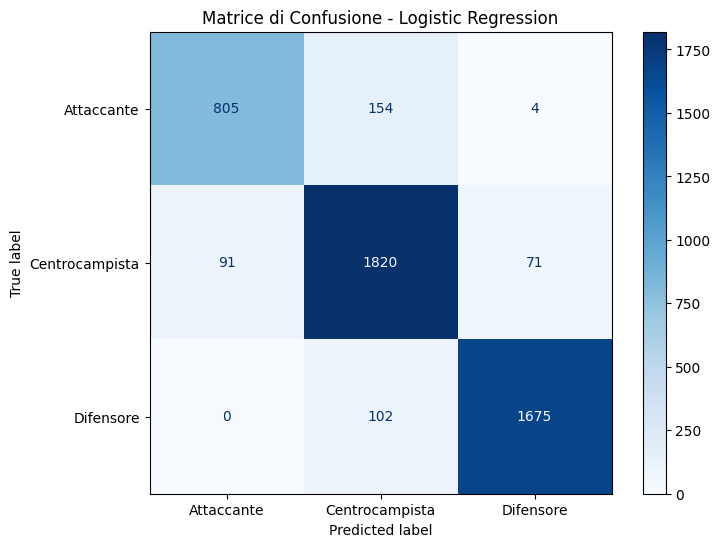

In [12]:
# --- 11. VALUTAZIONE MODELLO SUL TEST SET ---

print("Inizio valutazione sul Test Set...")

# 1. Facciamo le predizioni sui dati di test (l'esame)
y_pred_lr = model_lr.predict(X_test_scaled)

# 2. Calcoliamo l'accuratezza totale
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nAccuratezza (Logistic Regression): {accuracy_lr * 100:.2f}%")

# 3. Stampiamo il Classification Report (la metrica più importante)
# Mostra Precision, Recall e F1-score per ogni singola classe
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_lr))

# 4. Creiamo la Matrice di Confusione (per vedere DOVE sbaglia)
print("\n--- Matrice di Confusione ---")
# 
cm = confusion_matrix(y_test, y_pred_lr, labels=model_lr.classes_)

# Plottiamo la matrice con ConfusionMatrixDisplay per una grafica pulita
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                            display_labels=model_lr.classes_)

# Aumentiamo la leggibilità
disp.plot(cmap='Blues', ax=ax, xticks_rotation='horizontal')
plt.title("Matrice di Confusione - Logistic Regression")
plt.show()

### RANDOM FOREST

In [13]:
# --- 12. ADDESTRAMENTO MODELLO (RANDOM FOREST) ---

print("Inizio addestramento RandomForestClassifier...")

# Inizializziamo il modello
# n_estimators=100 è un buon punto di partenza
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Addestriamo il modello sui dati di training ORIGINALI (non scalati)
# Il RandomForest non ha bisogno dello scaling
model_rf.fit(X_train, y_train)

print("... Addestramento completato!")

Inizio addestramento RandomForestClassifier...
... Addestramento completato!


Inizio valutazione Random Forest sul Test Set...

Accuratezza (Random Forest): 90.81%

--- Classification Report (Random Forest) ---
                precision    recall  f1-score   support

    Attaccante       0.92      0.80      0.86       963
Centrocampista       0.86      0.93      0.90      1982
     Difensore       0.96      0.94      0.95      1777

      accuracy                           0.91      4722
     macro avg       0.91      0.89      0.90      4722
  weighted avg       0.91      0.91      0.91      4722


--- Matrice di Confusione (Random Forest) ---


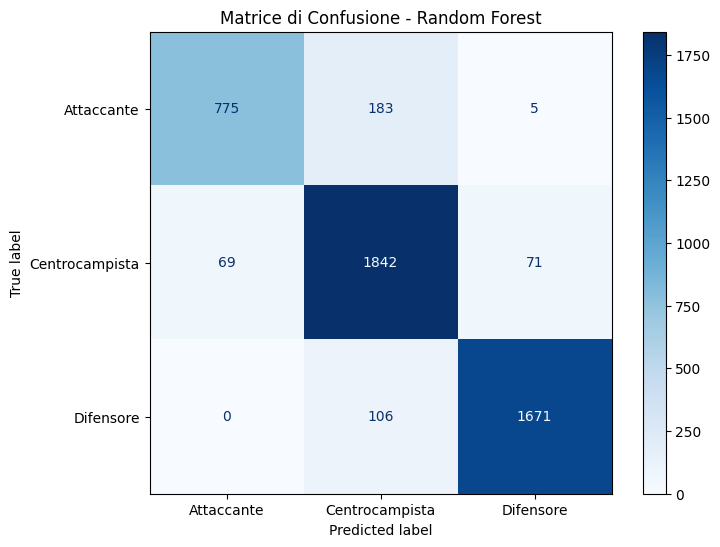

In [14]:
# --- 13. VALUTAZIONE MODELLO (RANDOM FOREST) ---

print("Inizio valutazione Random Forest sul Test Set...")

# 1. Facciamo le predizioni (usando X_test originale)
y_pred_rf = model_rf.predict(X_test)

# 2. Calcoliamo l'accuratezza
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuratezza (Random Forest): {accuracy_rf * 100:.2f}%")

# 3. Stampiamo il Classification Report
print("\n--- Classification Report (Random Forest) ---")
print(classification_report(y_test, y_pred_rf))

# 4. Creiamo la Matrice di Confusione
print("\n--- Matrice di Confusione (Random Forest) ---")
# 
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=model_rf.classes_)

# Plottiamo
fig, ax = plt.subplots(figsize=(8, 6))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, 
                               display_labels=model_rf.classes_)

disp_rf.plot(cmap='Blues', ax=ax, xticks_rotation='horizontal')
plt.title("Matrice di Confusione - Random Forest")
plt.show()

Estrazione delle Feature Importance...

--- Top 20 Feature più Importanti ---


,Feature,Importance
31,Sliding Tackle,0.058937
29,Def Awareness,0.057789
2,SHO,0.056448
27,Interceptions,0.054501
10,Finishing,0.052768
15,Vision,0.049290
30,Standing Tackle,0.048423
5,DEF,0.048196
39,num_alt_pos_cen,0.039632
38,num_alt_pos_att,0.036519


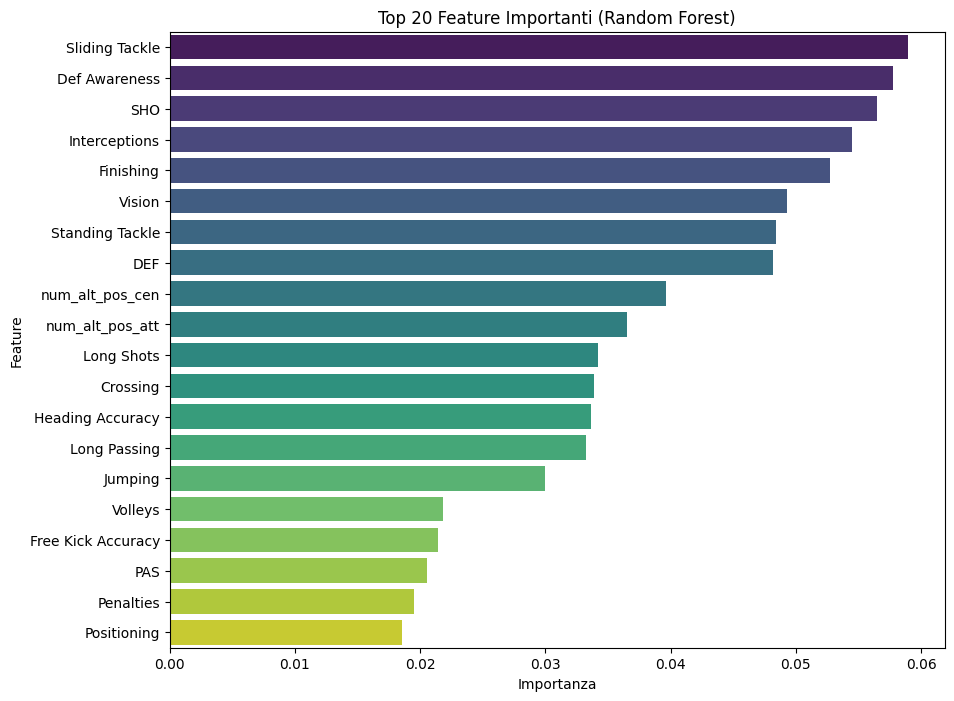

In [15]:
# --- 14. FEATURE IMPORTANCE (RANDOM FOREST) ---

print("Estrazione delle Feature Importance...")

# Otteniamo le importanze e i nomi delle feature
importances = model_rf.feature_importances_
feature_names = X_train.columns

# Creiamo un DataFrame per analizzarle meglio
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualizziamo le 20 feature più importanti
top_20_features = feature_importance_df.head(20)

print("\n--- Top 20 Feature più Importanti ---")
display(top_20_features)

# Creiamo un grafico a barre
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Feature Importanti (Random Forest)')
plt.xlabel('Importanza')
plt.ylabel('Feature')
plt.show()